## Jakub Suślik 
Przykładowe rozwiązanie problemu plecakowego z wykorzystaniem algorytmu genetycznego. Algorytm dodatkowo wykorzystuje procedurę naprawczą, polegającą na usuwaniu przedmiotów z najgorszym stadunkiem wartości do wagi, aby zapobiec pojawianiu się rozwiązań spoza dziedziny. 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random 


In [4]:
def generate_problem(wmin, wmax, vmin, vmax, items_num):
    w = np.random.randint(wmin, wmax, size=items_num)  #weight
    v = np.random.randint(vmin, vmax, size=items_num)  #values
    return w, v

In [64]:
np.random.seed(170432)
num = 50  # liczba przedmiotów
wmin = 1  # minimlana waga
wmax = 100  # maksymalna waga
vmin = 1  # minimalna wartosc
vmax = 100  # maksymalna wartosc
knapsack_perc = 0.2  # pojemnosc plecaka jako procent sumy wag wszystkich przedmiotow

w, v = generate_problem(wmin, wmax, vmin, vmax, num)  # w - wagi, v - wartosci
Wall = w.sum()
Vall = v.sum()
W = int(knapsack_perc * Wall) # pojemnosc plecaka

print('Problem plecakowy:')
print('pojemnosc plecaka:', W)
print('wagi:',w, 'suma:', Wall)
print('wartosci:',v, 'suma:', Vall)

Problem plecakowy:
pojemnosc plecaka: 476
wagi: [45 22 65 65 39 82 47  5 43 56  5 20 39 90 11 48 88 11 98 60 53 90 43 78
 25 97 69 48 88 22  9 16 60 73 38 26 37 79 96 27 62 40 45 74  8 14 39 13
 21 54] suma: 2383
wartosci: [23 42 19 16 82 75  7 76  8 62 42 18 16 72  2 88 70 32 31 37 19 77 85 32
 51 31 56 83 82 70 92 54 83 47 40  7 89 92 90 99 24 10 99 85 47 12 96 91
 88  8] suma: 2657


In [65]:
def remove_worst_items(w, v, W, sol):
    ii = np.argsort(v/w)
    for i in np.argwhere(sol[ii] == True):
        if w[sol].sum() <= W:
            break
        sol[ii[i]] = False
    return sol

In [97]:
def gen_pop(w, v, W, pop_size,f):
    pop = np.empty((pop_size,len(w)), dtype=bool)
    for i in range(len(pop)):
        pop[i]=np.random.randint(2, size=len(w), dtype=bool)
        while np.sum(w[pop[i]])>W:
                pop[i]=f(w,v,W,pop[i])
        
    return pop

def evaluate(pop, v):
    eval_pop=[]
    for i, ind in enumerate(pop):
        eval_pop.append(np.sum(v[ind]))
    return np.array(eval_pop)

def select(pop, evals):
    p_weights = evals*(1/sum(evals))
    for i in range(len(pop)):
        if np.sum(w[pop[i]])>W:
            p_weights[i]=0
    new_pop = random.choices(pop, weights = p_weights, k = len(pop))
    new_pop = np.asarray(new_pop)
    return new_pop
        
def xover(pop, p, w,v,W,f): 
    new_pop=np.empty_like(pop)
    podzial=random.randint(1,len(pop[0])-1)
    for i in range(len(pop)):
        r=random.random()
        if p > r:
            new_pop[i]=np.append(pop[i][:podzial],pop[(i+1)%len(pop)][podzial:])
            while np.sum(w[new_pop[i]])>W:
                new_pop[i]=f(w,v,W,new_pop[i])
    return new_pop



def mutate(pop, p, w,v,W,f):
    new_pop=pop
    for i in range(len(pop)):
        for j in range(len(pop[0])):
            r=random.random()
            if p > r:
                if new_pop[i][j]==True:
                    new_pop[i][j]=False
                else:
                    new_pop[i][j]=True
                while np.sum(w[new_pop[i]])>W:
                    new_pop[i]=f(w,v,W,new_pop[i])
    return new_pop

def evolve_knapsack(w, v, W, pop_size, pxover, pmutate, generations,f,plot=False):
    pop = gen_pop(w,v,W, pop_size,f)
    evals = evaluate(pop, v)
    i = np.argmax(evals)
    best = pop[i].copy()
    best_V = evals[i]
    best_iter = 0
    v_all = [best_V]
    v_best = [best_V]
    v_mean = [np.mean(evals)]


    for i in range(generations):
        pop = select(pop, evals)
        pop = xover(pop, pxover, w,v,W,f)
        pop = mutate(pop, pmutate, w,v,W,f)
        evals = evaluate(pop, v)
        ii = np.argmax(np.where(evals<=W,evals,0))
        temp_best_v = evals[ii]
        if temp_best_v > best_V:
            best_V = temp_best_v
            best_iter = i+1
            best = pop[ii].copy()
        v_all.append(temp_best_v)
        v_best.append(best_V)
        v_mean.append(np.mean(evals))
    if plot==True:
        plt.plot(v_best, 'r')
        plt.plot(v_all, 'g')
        plt.plot(v_mean, 'b')
        plt.show()
    
    print('Najlepsza wartość plecaka: ',best_V ,'\nWaga plecaka: ',w[best].sum(),' przy maksymalnej: ',W,'\nNajlepsza iteracja: ',best_iter)
    return best, w[best].sum(), best_V, best_iter

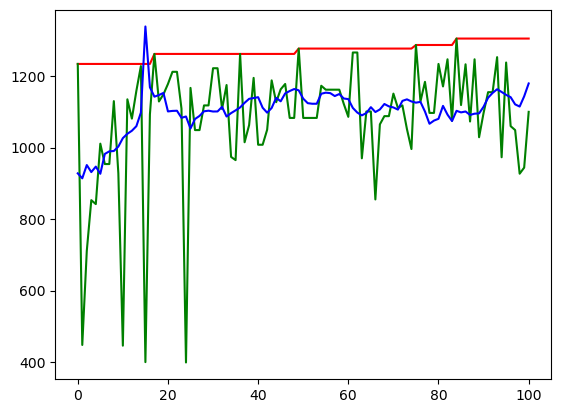

Najlepsza wartość plecaka:  1305 
Waga plecaka:  459  przy maksymalnej:  476 
Najlepsza iteracja:  84


In [98]:
solution=evolve_knapsack(w, v, W, 60, 0.7, 0.01, 100,remove_worst_items,True)

In [99]:
solution

(array([False,  True, False, False,  True, False, False,  True, False,
        False,  True, False, False, False, False,  True, False,  True,
        False, False, False, False,  True, False,  True, False, False,
         True, False,  True,  True, False, False, False, False, False,
         True, False, False,  True, False, False,  True, False, False,
        False,  True,  True,  True, False]),
 459,
 1305,
 84)